[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SeoulTechPSE/EngNm/blob/master/ch12_code.ipynb)

In [ ]:
# Rendering sympy equations requires MathJax to be available within each cell output. 
# The following is a function that will make this happen for Colab.

if 'google.colab' in str(get_ipython()):
    
    from sympy import init_printing
    from sympy.printing import latex

    def colab_LaTeX_printer(exp, **options):  
        from google.colab.output._publish import javascript 

        url_ = "https://colab.research.google.com/static/mathjax/MathJax.js?"
        cfg_ = "config=TeX-MML-AM_HTMLorMML" # "config=default"

        javascript(url=url_+cfg_)

        return latex(exp, **options)

    init_printing(use_latex="mathjax", latex_printer=colab_LaTeX_printer) 

# 03. Pandas: Data Processing and Analysis 

Creator: Robert Johansson, Updator: Kee-Youn Yoo

Updated source code listings for Numerical Python - A Practical Techniques Approach for Industry<p> (ISBN 978-1-484205-54-9)
    
<img src="figs/pandas_logo.png" width="400">

## Importing modules

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns

import numpy as np
import pandas as pd


## Series object

In [2]:
s = pd.Series([909976, 8615246, 2872086, 2273305]); s

0     909976
1    8615246
2    2872086
3    2273305
dtype: int64

In [3]:
type(s)

pandas.core.series.Series

In [4]:
s.dtype

dtype('int64')

In [5]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [6]:
s.values

array([ 909976, 8615246, 2872086, 2273305])

In [7]:
s.index = ["Stockholm", "London", "Rome", "Paris"]

In [8]:
s.name = "Population"

In [9]:
s

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [10]:
s = pd.Series([909976, 8615246, 2872086, 2273305], 
              index=["Stockholm", "London", "Rome", "Paris"], name="Population")

In [11]:
s["London"]

8615246

In [12]:
s.Stockholm

909976

In [13]:
s[["Paris", "Rome"]]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [14]:
s.median(), s.mean(), s.std()

(2572695.5, 3667653.25, 3399048.5005155364)

In [15]:
s.min(), s.max()

(909976, 8615246)

In [16]:
s.quantile(q=0.25), s.quantile(q=0.5), s.quantile(q=0.75)

(1932472.75, 2572695.5, 4307876.0)

In [17]:
s.describe()

count    4.000000e+00
mean     3.667653e+06
std      3.399049e+06
min      9.099760e+05
25%      1.932473e+06
50%      2.572696e+06
75%      4.307876e+06
max      8.615246e+06
Name: Population, dtype: float64

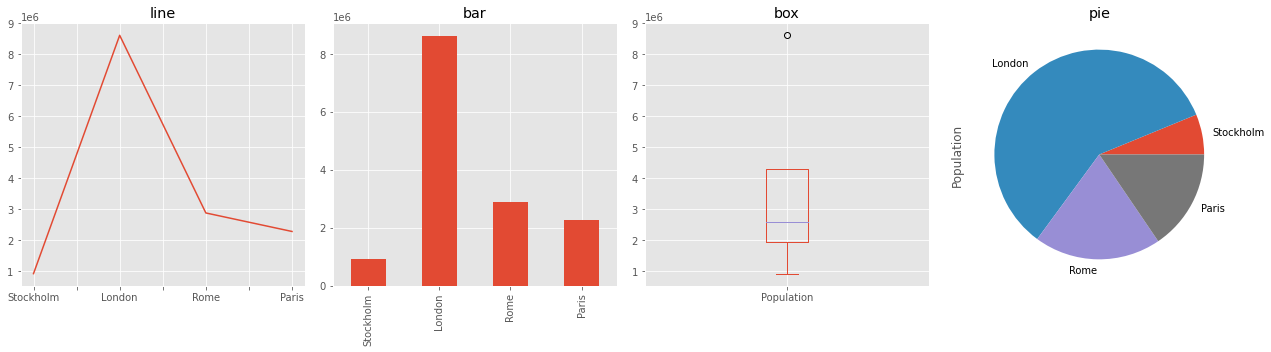

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

s.plot(ax=axes[0], kind='line', title="line")
s.plot(ax=axes[1], kind='bar', title="bar")
s.plot(ax=axes[2], kind='box', title="box")
s.plot(ax=axes[3], kind='pie', title="pie")

fig.tight_layout()
fig.savefig("./figs/ch3-series-plot.pdf")
fig.savefig("./figs/ch3-series-plot.png")

## DataFrame object

In [20]:
df = pd.DataFrame([[909976, 8615246, 2872086, 2273305],
                   ["Sweden", "United kingdom", "Italy", "France"]]); df

,0,1,2,3
0,909976,8615246,2872086,2273305
1,Sweden,United kingdom,Italy,France


In [21]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]]); df

,0,1
0,909976,Sweden
1,8615246,United kingdom
2,2872086,Italy
3,2273305,France


In [22]:
df.index = ["Stockholm", "London", "Rome", "Paris"]

In [23]:
df.columns = ["Population", "State"]

In [24]:
df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [25]:
df = pd.DataFrame([[909976, "Sweden"],
                   [8615246, "United kingdom"], 
                   [2872086, "Italy"],
                   [2273305, "France"]],
                  index=["Stockholm", "London", "Rome", "Paris"],
                  columns=["Population", "State"]); df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [26]:
df = pd.DataFrame({"Population": [909976, 8615246, 2872086, 2273305],
                   "State": ["Sweden", "United kingdom", "Italy", "France"]},
                  index=["Stockholm", "London", "Rome", "Paris"]); df

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


In [27]:
df.index

Index(['Stockholm', 'London', 'Rome', 'Paris'], dtype='object')

In [28]:
df.columns

Index(['Population', 'State'], dtype='object')

In [29]:
df.values

array([[909976, 'Sweden'],
       [8615246, 'United kingdom'],
       [2872086, 'Italy'],
       [2273305, 'France']], dtype=object)

In [30]:
df.Population

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [31]:
df["Population"]

Stockholm     909976
London       8615246
Rome         2872086
Paris        2273305
Name: Population, dtype: int64

In [32]:
type(df.Population)

pandas.core.series.Series

In [33]:
df.Population.Stockholm

909976

In [34]:
type(df.index)

pandas.core.indexes.base.Index

In [35]:
df.loc["Stockholm"]

Population    909976
State         Sweden
Name: Stockholm, dtype: object

In [36]:
type(df.loc["Stockholm"])

pandas.core.series.Series

In [37]:
df.loc[["Paris", "Rome"]]

,Population,State
Paris,2273305,France
Rome,2872086,Italy


In [38]:
df.loc[["Paris", "Rome"], "Population"]

Paris    2273305
Rome     2872086
Name: Population, dtype: int64

In [39]:
df.loc["Paris", "Population"]

2273305

In [41]:
df['Population'].mean()

3667653.25

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Stockholm to Paris
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Population  4 non-null      int64 
 1   State       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 268.0+ bytes


In [43]:
df.dtypes

Population     int64
State         object
dtype: object

In [44]:
df.head()

,Population,State
Stockholm,909976,Sweden
London,8615246,United kingdom
Rome,2872086,Italy
Paris,2273305,France


## Larger dataset

In [45]:
df_pop = pd.read_csv("./files/european_cities.csv")

In [46]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [47]:
df_pop = pd.read_csv("./files/european_cities.csv", delimiter=",", encoding="utf-8", header=0)

In [48]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Rank                     105 non-null    int64 
 1   City                     105 non-null    object
 2   State                    105 non-null    object
 3   Population               105 non-null    object
 4   Date of census/estimate  105 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.2+ KB


In [49]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate
0,1,London[2],United Kingdom,"8,615,246",1 June 2014
1,2,Berlin,Germany,"3,437,916",31 May 2014
2,3,Madrid,Spain,"3,165,235",1 January 2014
3,4,Rome,Italy,"2,872,086",30 September 2014
4,5,Paris,France,"2,273,305",1 January 2013


In [50]:
df_pop["NumericPopulation"] = df_pop.Population.apply(lambda x: int(x.replace(",", ""))); df_pop

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305
...,...,...,...,...,...,...
100,101,Bonn,Germany,"309,869",31 December 2012,309869
101,102,Malmö,Sweden,"309,105",31 March 2013,309105
102,103,Nottingham,United Kingdom,"308,735",30 June 2012,308735
103,104,Katowice,Poland,"308,269",30 June 2012,308269


In [51]:
df_pop["State"].values[:3]

array([' United Kingdom', ' Germany', ' Spain'], dtype=object)

In [52]:
df_pop["State"] = df_pop["State"].apply(lambda x: x.strip())

In [53]:
df_pop.head()

,Rank,City,State,Population,Date of census/estimate,NumericPopulation
0,1,London[2],United Kingdom,"8,615,246",1 June 2014,8615246
1,2,Berlin,Germany,"3,437,916",31 May 2014,3437916
2,3,Madrid,Spain,"3,165,235",1 January 2014,3165235
3,4,Rome,Italy,"2,872,086",30 September 2014,2872086
4,5,Paris,France,"2,273,305",1 January 2013,2273305


In [54]:
df_pop.dtypes

Rank                        int64
City                       object
State                      object
Population                 object
Date of census/estimate    object
NumericPopulation           int64
dtype: object

In [55]:
df_pop2 = df_pop.set_index("City")

In [56]:
df_pop2 = df_pop2.sort_index()

In [57]:
df_pop2.head()

,Rank,State,Population,Date of census/estimate,NumericPopulation
City,,,,,
Aarhus,92,Denmark,"326,676",1 October 2014,326676
Alicante,86,Spain,"334,678",1 January 2012,334678
Amsterdam,23,Netherlands,"813,562",31 May 2014,813562
Antwerp,59,Belgium,"510,610",1 January 2014,510610
Athens,34,Greece,"664,046",24 May 2011,664046


In [58]:
df_pop3 = df_pop.set_index(["State", "City"]).sort_index(level=0)

In [59]:
df_pop3.head(7)

Rank Population Date of census/estimate  \
State    City                                                    
Austria  Vienna           7  1,794,770          1 January 2015   
Belgium  Antwerp         59    510,610          1 January 2014   
         Brussels[17]    16  1,175,831          1 January 2014   
Bulgaria Plovdiv         84    341,041        31 December 2013   
         Sofia           14  1,291,895        14 December 2014   
         Varna           85    335,819        31 December 2013   
Croatia  Zagreb          24    790,017           31 March 2011   

                       NumericPopulation  
State    City                             
Austria  Vienna                  1794770  
Belgium  Antwerp                  510610  
         Brussels[17]            1175831  
Bulgaria Plovdiv                  341041  
         Sofia                   1291895  
         Varna                    335819  
Croatia  Zagreb                   790017

In [60]:
df_pop3.loc["Sweden"]

,Rank,Population,Date of census/estimate,NumericPopulation
City,,,,
Gothenburg,53,"528,014",31 March 2013,528014
Malmö,102,"309,105",31 March 2013,309105
Stockholm,20,"909,976",31 January 2014,909976


In [ ]:
df_pop3.loc[("Sweden", "Gothenburg")]

In [ ]:
df_pop.set_index("City").sort_values(["State", "NumericPopulation"], ascending=[False, True]).head()

In [ ]:
city_counts = df_pop.State.value_counts()

In [ ]:
city_counts.name = "# cities in top 105"

In [ ]:
city_counts

In [ ]:
df_pop3 = df_pop[["State", "City", "NumericPopulation"]].set_index(["State", "City"])

In [ ]:
df_pop4 = df_pop3.sum(level="State").sort_values("NumericPopulation", ascending=False)

In [ ]:
df_pop4.head()

In [ ]:
df_pop5 = (df_pop.drop("Rank", axis=1)
                 .groupby("State").sum()
                 .sort_values("NumericPopulation", ascending=False))

In [ ]:
df_pop5.head()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

city_counts.plot(kind='barh', ax=ax1)
ax1.set_xlabel("# cities in top 105")
df_pop5.NumericPopulation.plot(kind='barh', ax=ax2)
ax2.set_xlabel("Total population in top 105 cities")

fig.tight_layout()
fig.savefig("./figs/ch12-state-city-counts-sum.pdf")

## Time series

In [ ]:
import datetime

In [ ]:
pd.date_range("2015-1-1", periods=31)

In [ ]:
pd.date_range(datetime.datetime(2015, 1, 1), periods=31)

In [ ]:
pd.date_range("2015-1-1 00:00", "2015-1-1 12:00", freq="H")

In [ ]:
ts1 = pd.Series(np.arange(31), index=pd.date_range("2015-1-1", periods=31))

In [ ]:
ts1.head()

In [ ]:
ts1["2015-1-3"]

In [ ]:
ts1.index[2]

In [ ]:
ts1.index[2].year, ts1.index[2].month, ts1.index[2].day

In [ ]:
ts1.index[2].nanosecond

In [ ]:
ts1.index[2].to_pydatetime()

In [ ]:
ts2 = pd.Series(np.random.rand(2), 
                index=[datetime.datetime(2015, 1, 1), datetime.datetime(2015, 2, 1)])

In [ ]:
ts2

In [ ]:
periods = pd.PeriodIndex([pd.Period('2015-01'), pd.Period('2015-02'), pd.Period('2015-03')])

In [ ]:
ts3 = pd.Series(np.random.rand(3), periods)

In [ ]:
ts3

In [ ]:
ts3.index

In [ ]:
ts2.to_period('M')

In [ ]:
pd.date_range("2015-1-1", periods=12, freq="M").to_period()

### Temperature time series example

In [ ]:
df1 = pd.read_csv('./files/temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])

In [ ]:
df2 = pd.read_csv('./files/temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])

In [ ]:
df1.head()

In [ ]:
df2.head()

In [ ]:
df1.time = (pd.to_datetime(df1.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Asia/Seoul'))

In [ ]:
df1 = df1.set_index("time")

In [ ]:
df2.time = (pd.to_datetime(df2.time.values, unit="s")
              .tz_localize('UTC').tz_convert('Asia/Seoul'))

In [ ]:
df2 = df2.set_index("time")

In [ ]:
df1.head()

In [ ]:
df1.index[0]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
df1.plot(ax=ax)
df2.plot(ax=ax)

fig.tight_layout()
fig.savefig("./figs/ch12-timeseries-temperature-2014.pdf")

In [ ]:
df1.info()

In [ ]:
# select january data
df1_jan = df1[(df1.index > "2014-1-1") & (df1.index < "2014-2-1")]

In [ ]:
df1.index < "2014-2-1"

In [ ]:
df1_jan.info()

In [ ]:
df2_jan = df2["2014-1-1":"2014-1-31"]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_jan.plot(ax=ax)
df2_jan.plot(ax=ax)

fig.tight_layout()
fig.savefig("./figs/ch12-timeseries-selected-month.pdf")

In [ ]:
df1_month = df1.reset_index()

In [ ]:
# group by month
df1_month["month"] = df1_month.time.apply(lambda x: x.month)

In [ ]:
df1_month.head()

In [ ]:
df1_month = df1_month.groupby("month").aggregate(np.mean)

In [ ]:
df2_month = df2.reset_index()

In [ ]:
df2_month["month"] = df2_month.time.apply(lambda x: x.month)

In [ ]:
df2_month = df2_month.groupby("month").aggregate(np.mean)

In [ ]:
df_month = df1_month.join(df2_month)

In [ ]:
df_month.head(3)

In [ ]:
df_month = pd.concat([df.tz_localize(None).to_period("M").groupby(level=0).mean() for df in [df1, df2]], axis=1)

In [ ]:
df_month.head(3)

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

df_month.plot(kind='bar', ax=axes[0])
df_month.plot(kind='box', ax=axes[1])

fig.tight_layout()
fig.savefig("./figs/ch12-grouped-by-month.pdf")

In [ ]:
df_month

In [ ]:
# resampling
df1_hour = df1.resample("H").mean()

In [ ]:
df1_hour.columns = ["outdoor (hourly avg.)"]

In [ ]:
df1_day = df1.resample("D").mean()

In [ ]:
df1_day.columns = ["outdoor (daily avg.)"]

In [ ]:
df1_week = df1.resample("7D").mean()

In [ ]:
df1_week.columns = ["outdoor (weekly avg.)"]

In [ ]:
df1_month = df1.resample("M").mean()

In [ ]:
df1_month.columns = ["outdoor (monthly avg.)"]

In [ ]:
df_diff = (df1.resample("D").mean().outdoor -df2.resample("D").mean().indoor)

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))

df1_hour.plot(ax=ax1, alpha=0.25)
df1_day.plot(ax=ax1)
df1_week.plot(ax=ax1)
df1_month.plot(ax=ax1)

df_diff.plot(ax=ax2)
ax2.set_title("temperature difference between outdoor and indoor")

fig.tight_layout()
fig.savefig("./figs/ch12-timeseries-resampled.pdf")

In [ ]:
pd.concat([df1.resample("5min").mean().rename(columns={"outdoor": 'None'}),
           df1.resample("5min").mean().ffill().rename(columns={"outdoor": 'ffill'}),
           df1.resample("5min").mean().bfill().rename(columns={"outdoor": 'bfill'})], axis=1).head()

## Selected day

In [ ]:
df1_dec25 = df1.loc["2014-12-25"]

In [ ]:
df1_dec25.head(5)

In [ ]:
df2_dec25 = df2.loc["2014-12-25"]

In [ ]:
df2_dec25.head(5)

In [ ]:
df1_dec25.describe().T

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

df1_dec25.plot(ax=ax)

fig.savefig("./figs/ch12-timeseries-selected-month.pdf")

# Seaborn statistical visualization library

In [ ]:
sns.set(style="darkgrid")

In [ ]:
df1 = pd.read_csv('./files/temperature_outdoor_2014.tsv', delimiter="\t", names=["time", "outdoor"])
df1.time = pd.to_datetime(df1.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df1 = df1.set_index("time").resample("10min").mean()

df2 = pd.read_csv('./files/temperature_indoor_2014.tsv', delimiter="\t", names=["time", "indoor"])
df2.time = pd.to_datetime(df2.time.values, unit="s").tz_localize('UTC').tz_convert('Europe/Stockholm')
df2 = df2.set_index("time").resample("10min").mean()

df_temp = pd.concat([df1, df2], axis=1)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

df_temp.resample("D").mean().plot(y=["outdoor", "indoor"], ax=ax)
fig.tight_layout()
fig.savefig("./files/h12-seaborn-plot.pdf")

In [ ]:
sns.displot(df_temp.tz_localize(None).to_period("M")["outdoor"]["2014-04"].dropna().values, bins=50);
sns.displot(df_temp.tz_localize(None).to_period("M")["indoor"]["2014-04"].dropna().values, bins=50);

plt.savefig("./figs/ch12-seaborn-distplot.pdf")

In [ ]:
with sns.axes_style("white"):
    sns.jointplot(x=df_temp.resample("H").mean()["outdoor"].values,
                  y=df_temp.resample("H").mean()["indoor"].values, kind="hex");
    
plt.savefig("./figs/ch12-seaborn-jointplot.pdf")

In [ ]:
sns.kdeplot(data=df_temp.resample("H").mean()["outdoor"].dropna().values,
            x=df_temp.resample("H").mean()["outdoor"].dropna().values, shade=False);

plt.savefig("./files/ch12-seaborn-kdeplot.pdf")

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

sns.boxplot(data=df_temp.dropna(), ax=ax1, palette="pastel")
sns.violinplot(data=df_temp.dropna(), ax=ax2, palette="pastel")

fig.tight_layout()
fig.savefig("./files/ch12-seaborn-boxplot-violinplot.pdf")

In [ ]:
sns.violinplot(x=df_temp.dropna().index.month, y=df_temp.dropna().outdoor, color="skyblue");

plt.savefig("./files/ch12-seaborn-violinplot.pdf")

In [ ]:
df_temp["month"] = df_temp.index.month
df_temp["hour"] = df_temp.index.hour

In [ ]:
df_temp.head()

In [ ]:
table = pd.pivot_table(df_temp, values='outdoor', index=['month'], columns=['hour'], aggfunc=np.mean)

In [ ]:
table

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.heatmap(table, ax=ax);

fig.tight_layout()
fig.savefig("./files/ch12-seaborn-heatmap.pdf")

## Versions

In [ ]:
print("numpy: ", np.__version__)
print("pandas: ", pd.__version__)
print("matplotlib: ", mpl.__version__)
print("seaborn: ", sns.__version__)